### Muhammad Rafi Andeo Praja

### 1301200278

### Penggunaan Library:

Pandas -> Melakukan import dataset

Numpy -> Melakukan pengolahan dataset

Matplotlib -> Melakukan pemodelan dataset berupa grafik

Seaborn -> Melakukan pemodelan dataset dengan atribut lebih dari satu

Sklearn -> Melakukan perhitungan prediksi dataset menggunakan algoritma machine learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.neural_network as ann
import sklearn.model_selection as ms
from sklearn.preprocessing import MinMaxScaler

### Menampilkan isi dataset 5 teratas dan 5 terbawah

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


### Menampilkan jumlah baris dan jumlah features dataset

In [ ]:
df.shape

(452, 280)

### Menampilkan jumlah missing value dataset

In [ ]:
nanValue = 0
for i in range(0, 452):
  for j in range(0, 280):
    if (df.iloc[i, j] == "?"):
      nanValue += 1
print("Missing value yang terdapat pada dataset tersebut adalah:", nanValue)
df = df.replace("?", np.NaN)

Missing value yang terdapat pada dataset tersebut adalah: 408


Text(0, 0.5, 'Count of ?')

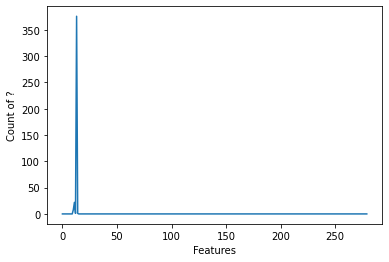

In [ ]:
pd.isnull(df).sum().plot()
plt.xlabel('Features')
plt.ylabel('Count of ?')

Text(0, 0.5, 'Count of ?')

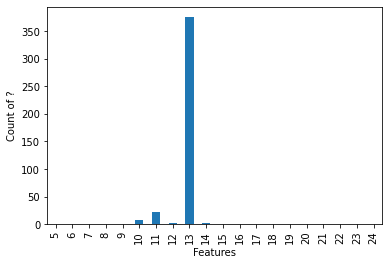

In [ ]:
pd.isnull(df).sum()[5:25].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count of ?')

In [ ]:
df.drop(columns = 13, inplace=True)

### Mengubah missing value menjadi nilai modus

In [ ]:
df[10].replace([np.nan], df[10].mode()[0], inplace=True)
df[11].replace([np.nan], df[11].mode()[0], inplace=True)
df[12].replace([np.nan], df[12].mode()[0], inplace=True)
df[14].replace([np.nan], df[14].mode()[0], inplace=True)

In [ ]:
nanValue = 0
for i in range(0, 452):
  for j in range(0, 279):
    if (df.iloc[i, j] == np.nan):
      nanValue += 1
print("Missing value yang terdapat pada dataset tersebut adalah:", nanValue)

Missing value yang terdapat pada dataset tersebut adalah: 0


### Menambahkan attribute kedalam dataset

In [ ]:
x_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

### Hasil dataset yang sudah lengkap dengan nama atribute

Membuat variabel baru x dan y yang akan digunakan di dalam algoritma neural network

In [ ]:
data = pd.DataFrame(df)
x = data.drop(columns = 278)
x.columns = x_columns
x.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,7


In [ ]:
y = pd.DataFrame(df, columns = [279])
y.head()

,279
0,8
1,6
2,10
3,1
4,7


### Mencari attribute yang memiliki outlier value atau value yang bernilai tidak wajar

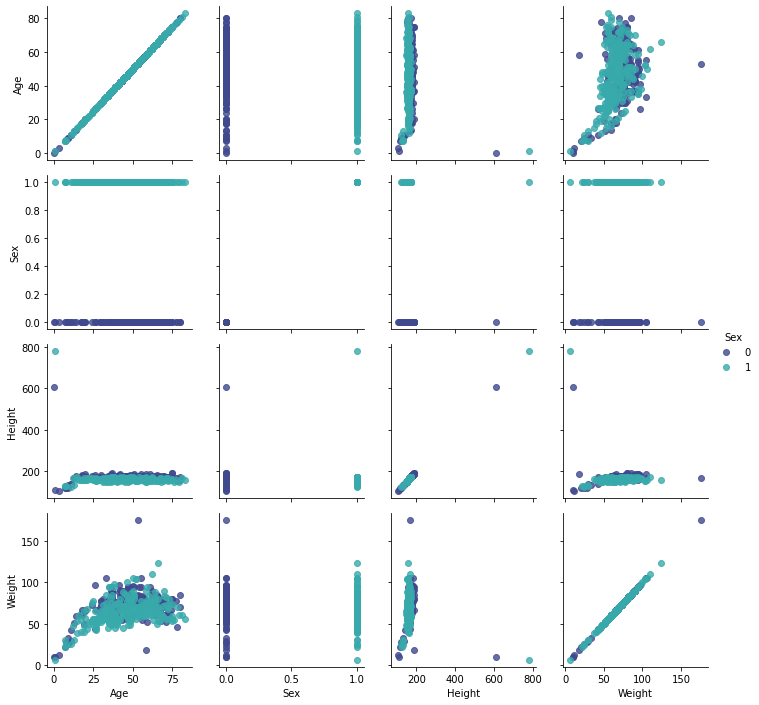

In [ ]:
g = sns.PairGrid(x, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='mako')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### Mengubah outlier value menjadi value yang normal

In [ ]:
sorted(x['Height'], reverse=True)[:10]

[780, 608, 190, 190, 190, 188, 186, 186, 186, 185]

In [ ]:
x['Height'] = x['Height'].replace(608,108)
x['Height'] = x['Height'].replace(780,180)

### Menampilkan hasil grafik dengan pengubahan outlier value

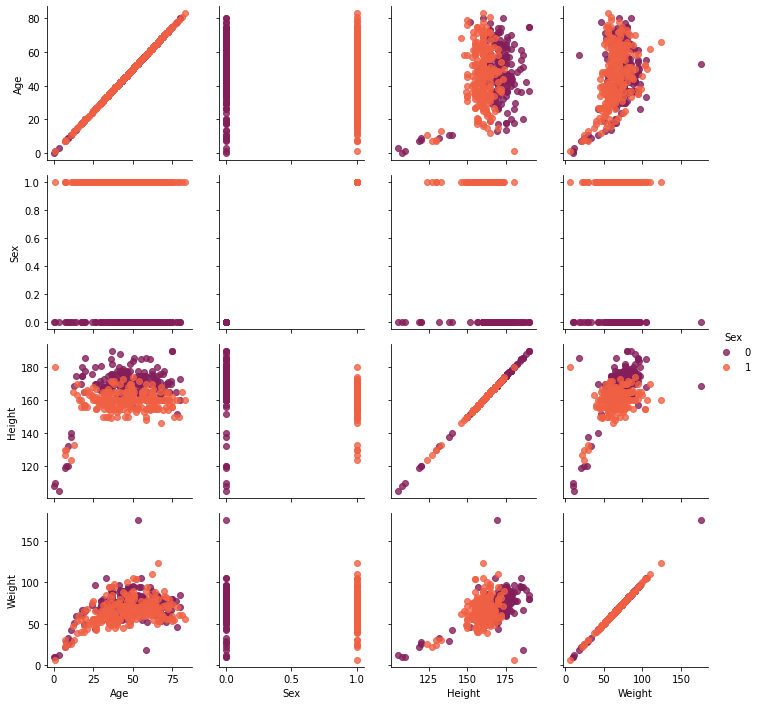

In [ ]:
g = sns.PairGrid(x, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='rocket')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### Membuat variabel x train, x test, y train, dan y test yang akan digunakan di algoritma neural network

In [ ]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.20, random_state = 10)
print("Jumlah data training : ", len(x_train))
print("Jumlah data testing  : ", len(x_test))

Jumlah data training :  361
Jumlah data testing  :  91


### Melakukan proses scalling terhadap variabel x train dan x test

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Menggunakan perhitungan prediksi data menggunakan algoritma neural network MLP

Fungsi Logistic Sigmoid

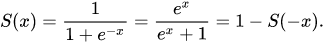

In [ ]:
mlp = ann.MLPClassifier(activation='logistic', random_state=10, hidden_layer_sizes=(250,), max_iter=2500)
mlp.fit(x_train, np.ravel(y_train))

MLPClassifier(activation='logistic', hidden_layer_sizes=(250,), max_iter=2500,
              random_state=10)

In [ ]:
prediksi = mlp.predict(x_test)
print(prediksi)

[ 3  1  2  1  1  1  2  1  4  2  1  1  1 10 10  1  1  3  1 10  6  4  1  1
  1  1  1 16  1  1  1  1  1  1  1 10  1  6  2  1  6 10  2  1  1  6  1  1
  4  3  1  1  1  1  1  1  1 10  1  1  1  1  1  1 16  1 10  1 10  2 10 10
  2 10  1  1  1  1  1  1  2  1  1  1  1  1  2  9  1  1  1]


### Menampilkan nilai akurasi model

In [ ]:
count = 0
for i, output in enumerate(np.ravel(y_test)):
  if output == prediksi[i]:
    count += 1
print("Akurasi model: {}%".format(round(count/len(y_test)*100, 2)))

Akurasi model: 78.02%


In [ ]:
import sklearn.metrics as met
print(met.classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           1       0.86      0.96      0.91        52
           2       0.33      0.43      0.38         7
           3       1.00      0.75      0.86         4
           4       0.67      0.50      0.57         4
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         4
           9       1.00      0.33      0.50         3
          10       0.82      1.00      0.90         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.50      0.25      0.33         4

    accuracy                           0.78        91
   macro avg       0.52      0.43      0.45        91
weighted avg       0.75      0.78      0.75        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fungsi Rectified Linear Unit (relu)

image.png

In [ ]:
mlp = ann.MLPClassifier(activation='relu', random_state=10, hidden_layer_sizes=(250,), max_iter=2500)
mlp.fit(x_train, np.ravel(y_train))

MLPClassifier(hidden_layer_sizes=(250,), max_iter=2500, random_state=10)

In [ ]:
prediksi = mlp.predict(x_test)
print(prediksi)

[ 3  1  2  1  1  1  2  1  4  2  1  1  1 10 10  1  1  3  1 10  6  4  1  1
  1  1  1 16  1  1  1  1  1  1  1 10  1  6  2  1  6 16  2  1  1  6  1  1
  4  3  1  1  1  1  1  1  1 10  1  1  1  1  1  1 16  1 10  1 10  2 10 10
  2 10  1  1  1  1  1  1  2  1  1  1  1  1  2  9  1  1  1]


### Menampilkan nilai akurasi model

In [ ]:
count = 0
for i, output in enumerate(np.ravel(y_test)):
  if output == prediksi[i]:
    count += 1
print("Akurasi model: {}%".format(round(count/len(y_test)*100, 2)))

Akurasi model: 79.12%


In [ ]:
import sklearn.metrics as met
print(met.classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           1       0.86      0.96      0.91        52
           2       0.33      0.43      0.38         7
           3       1.00      0.75      0.86         4
           4       0.67      0.50      0.57         4
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         4
           9       1.00      0.33      0.50         3
          10       0.90      1.00      0.95         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.67      0.50      0.57         4

    accuracy                           0.79        91
   macro avg       0.54      0.45      0.48        91
weighted avg       0.76      0.79      0.77        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fungsi Tangen Hyperbolik (tanh)

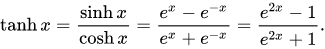

In [ ]:
mlp = ann.MLPClassifier(activation='tanh', random_state=10, hidden_layer_sizes=(250,), max_iter=2500)
mlp.fit(x_train, np.ravel(y_train))

MLPClassifier(activation='tanh', hidden_layer_sizes=(250,), max_iter=2500,
              random_state=10)

In [ ]:
prediksi = mlp.predict(x_test)
print(prediksi)

[ 3  1  2  1  1  1  2  1  4  2  1  1  1 10 10  1  1  3  1 10  6  4  1  1
  1  4  1 16  1  1  1  1  1  1  1 10  1  6  2  1  6 16  2  1  1  6  1  1
  4  3  1  1  1  1  1  4  1 10  1  1  1  1  1  1 16  1 10  1 10  2 10 10
  2 10  1  1  1  1  1  1  2  1  1  1  1  1  2  9  1  1  1]


### Menampilkan nilai akurasi model

In [ ]:
count = 0
for i, output in enumerate(np.ravel(y_test)):
  if output == prediksi[i]:
    count += 1
print("Akurasi model: {}%".format(round(count/len(y_test)*100, 2)))

Akurasi model: 81.32%


In [ ]:
import sklearn.metrics as met
print(met.classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           1       0.89      0.96      0.93        52
           2       0.33      0.43      0.38         7
           3       1.00      0.75      0.86         4
           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         4
           9       1.00      0.33      0.50         3
          10       0.90      1.00      0.95         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.67      0.50      0.57         4

    accuracy                           0.81        91
   macro avg       0.55      0.50      0.51        91
weighted avg       0.79      0.81      0.79        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Kesimpulan

Kesimpulan yang dapat saya berikan dari penggunaan algoritma MLP berikut dengan menggunakan 3 fungsi yang berbeda adalah terdapat perbedaan tingkat akurasi berdasarkan penggunaan 3 fungsi tersebut yang dimana fungsi tangen hyperbolik dapat menghasilkan akurasi yang besar jika memperbesar jumlah test size dan jumlah random state dan memperkecil jumlah max iteration dan jumlah hidden layer size yang dimana menjadi kunci utama pengolahan dataset dalam algoritma MLP. Hasil akurasi terbukti bahwa fungsi tangen hyperbolik memiliki akurasi tertinggi dengan fungsi rectified linear unit yang menjadi fungsi kedua dengan tingkat akurasi tertinggi dan fungsi logistic sigmoid memiliki tingkat akurasi terendah tetapi semua akurasi memiliki tingkatan diatas 75% yang dimana dapat disimpulkan sebagai algoritma yang cukup mampu dalam mengolah dataset tersebut.

Class Distribution:
       Database:  Arrhythmia
       
       Class code :   Class   :                             Number of instances:
       01             Normal				                        245
       02             Ischemic changes (Coronary Artery Disease)     44
       03             Old Anterior Myocardial Infarction             15
       04             Old Inferior Myocardial Infarction             15
       05             Sinus tachycardy			                   13
       06             Sinus bradycardy			                   25
       07             Ventricular Premature Contraction (PVC)         3
       08             Supraventricular Premature Contraction	      2
       09             Left bundle branch block 		               9	
       10             Right bundle branch block		              50
       11             1. degree AtrioVentricular block	            0	
       12             2. degree AV block		                      0
       13             3. degree AV block		                      0
       14             Left ventricule hypertrophy 	                4
       15             Atrial Fibrillation or Flutter	              5
       16             Others				                         22

